In [ ]:
!pip install peakdetect
import itertools
from peakdetect import peakdetect
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import scipy.interpolate as spi
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import CountVectorizer
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
print("libraries are ok")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
libraries are ok


1. Load dataset
Dataset visualtisation. Y data - it  is peak in the graph after filter in the X data after band pass filter
In the current moment X data is Raw

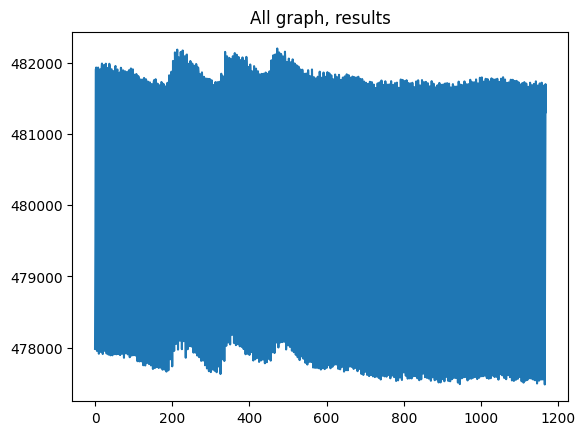

In [ ]:
len_data = 1169
value_data = 27

dataset_y = pd.read_excel("/content/drive/MyDrive/EEG_ML/EMD/dataset_zero/y.xlsx")

dataset_y = dataset_y.transpose()
plt.plot(dataset_y.iloc[0])
plt.title("All graph, results")
plt.show()

2.Band-pass filter for Y data

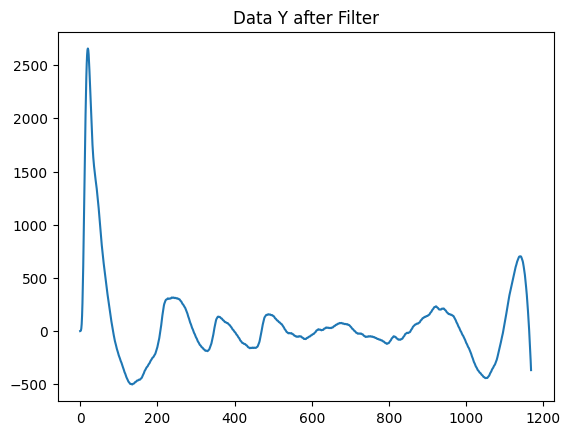

In [ ]:

def butter_highpass(cutoff, fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff_high, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

fps = 250
cutoff_high=1
cutoff_low=10
x=[]
for a in range(0,value_data,1):
    filtered_sine_high = butter_highpass_filter(dataset_y.iloc[a], cutoff_high, fps)
    filtered_high_pass= butter_lowpass_filter(filtered_sine_high, cutoff_low, fps)
    dataset_y.iloc[a] = filtered_high_pass
    test =filtered_high_pass

new_dataset_y = dataset_y
dataset_y = dataset_y.to_numpy()
plt.plot(dataset_y[0])
plt.title("Data Y after Filter")
plt.show()

#dataset_y = dataset_y[:, :1000]
#dataset_y = dataset_y[:, 200:]
#plt.plot(dataset_y[0])
#plt.title("Data Y after Filter, short version")
#plt.show()


3.Preprocessing

peaks [[[20, 2656.41108335176], [242, 316.1072223349027], [358, 136.24706968793268], [487, 158.8543875470862], [617, 17.75309706256057], [637, 34.30513284197099], [677, 77.53492241754422], [752, -46.944371669318606], [812, -48.611797860839836], [922, 233.0500023412193], [942, 212.5918325276103], [1141, 703.2349209406735]], [[135, -501.309969393683], [330, -188.13548243868556], [440, -160.5042546656707], [584, -74.90088018155808], [625, 7.578383596430455], [645, 27.964301664371643], [740, -55.03407323715208], [795, -119.65636852824063], [829, -81.2100929195491], [934, 202.28428314150383], [1050, -441.82281520417774]]]
[[[0, 0]], [[20, 2656.41108335176], [242, 316.1072223349027], [358, 136.24706968793268], [487, 158.8543875470862], [617, 17.75309706256057], [637, 34.30513284197099], [677, 77.53492241754422], [752, -46.944371669318606], [812, -48.611797860839836], [922, 233.0500023412193], [942, 212.5918325276103], [1141, 703.2349209406735]], [[135, -501.309969393683], [330, -188.13548243

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


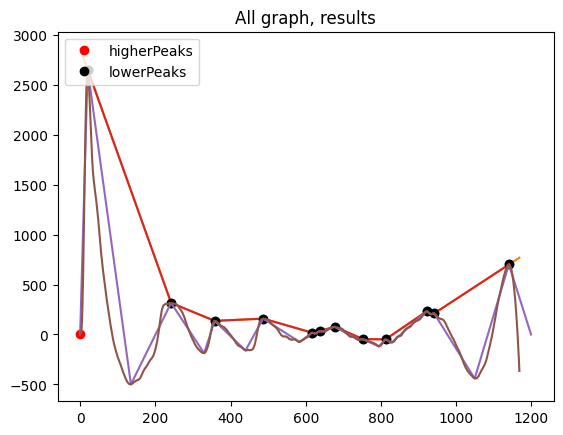

peaks [[[20, 2611.1940689111325], [207, 141.84821926654408], [292, 260.82384622985643], [407, 110.72209707324815], [427, 104.98731861376493], [502, -18.016063890447665], [537, -1.840906869646795], [582, 18.38332275683937], [607, 31.54467298110871], [632, 44.93002845273281], [657, 37.28254157900274], [682, 19.362110087039625], [702, 22.114800276609625], [752, -37.073676488500986], [792, -66.88948981173105], [812, -76.65655785959906], [927, 235.335446569937], [1138, 686.956674702952]], [[135, -537.1105765813434], [254, -67.17350736104524], [379, -205.7420132169436], [419, 94.68119589558104], [464, -58.737809659648654], [514, -35.29561089582381], [549, -9.942447413349537], [590, 6.428932453054185], [615, 19.06606643138397], [645, 25.1723631417967], [675, 14.071410735481466], [690, 9.833944613036762], [744, -44.86964027725309], [780, -79.3532499170907], [805, -83.82900002388352], [820, -84.24151164968342], [1054, -462.0691499949092]]]
[[[0, 0]], [[20, 2611.1940689111325], [207, 141.8482192

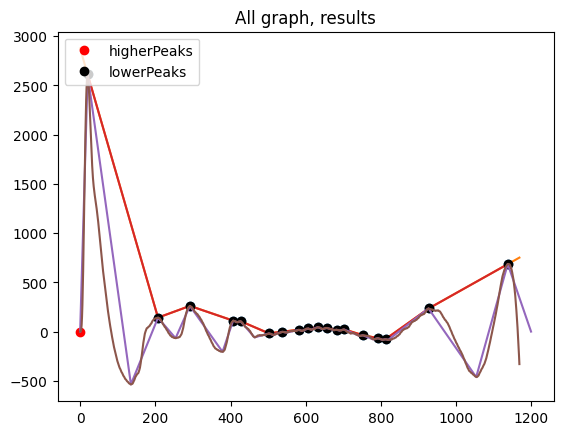

peaks [[[20, 2547.1296661379674], [212, 161.22817407818644], [297, 202.92590603311004], [402, 76.8058299044049], [422, 82.33772441985636], [487, -8.293310985382377], [502, -10.72729580754997], [522, -3.8460193612984033], [557, -5.0592160071853245], [582, 14.255344117942313], [602, 27.171197844637753], [622, 24.049626792914175], [647, 50.18771415016458], [677, 41.0232095223378], [702, 49.53280925196583], [932, 235.0309232496039], [1142, 670.261456421938]], [[144, -507.1627041174088], [264, -2.583454167432062], [364, -185.45876556614795], [410, 55.847363404706975], [465, -34.86542118818242], [494, -16.704732709889367], [510, -17.32196730154331], [544, -33.94423679948968], [565, -11.894473804871854], [590, 4.586956735986717], [615, 12.556494845353667], [634, 10.833061056603468], [660, 19.375879190176253], [689, 23.627404699778367], [799, -108.302566281915], [1054, -434.7903561180624]]]
[[[0, 0]], [[20, 2547.1296661379674], [212, 161.22817407818644], [297, 202.92590603311004], [402, 76.805

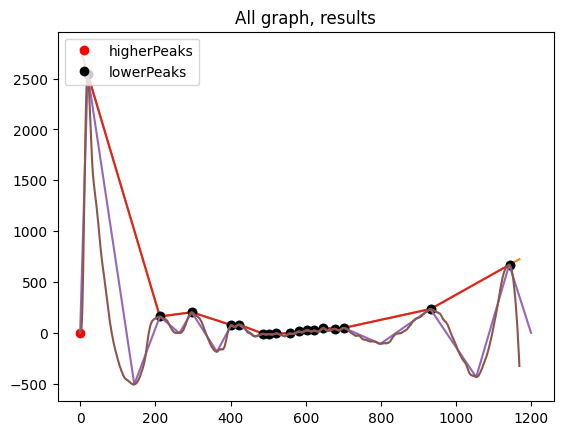

peaks [[[20, 2529.3120952224485], [213, 183.94511475547733], [302, 201.08081683882497], [397, 103.39535111225771], [507, 67.1281238964118], [532, 55.52856602337197], [582, 3.227436170216138], [597, 6.2103102521765], [632, 17.736160688255534], [677, 25.04975472939671], [702, 22.082854052553376], [722, 13.643106251790075], [932, 212.39199501158458], [1142, 654.2034917950905]], [[134, -496.7470033612632], [278, -31.520634139653705], [360, -216.04640854997783], [464, -155.2650155100068], [524, 30.85665471489516], [570, -11.63634828157926], [589, -2.3467180471514326], [605, -14.41606675655933], [649, 0.6489788119765433], [689, 11.6717719365278], [715, -2.5765539709028706], [805, -102.41308150471394], [1049, -422.1612789407737]]]
[[[0, 0]], [[20, 2529.3120952224485], [213, 183.94511475547733], [302, 201.08081683882497], [397, 103.39535111225771], [507, 67.1281238964118], [532, 55.52856602337197], [582, 3.227436170216138], [597, 6.2103102521765], [632, 17.736160688255534], [677, 25.0497547293

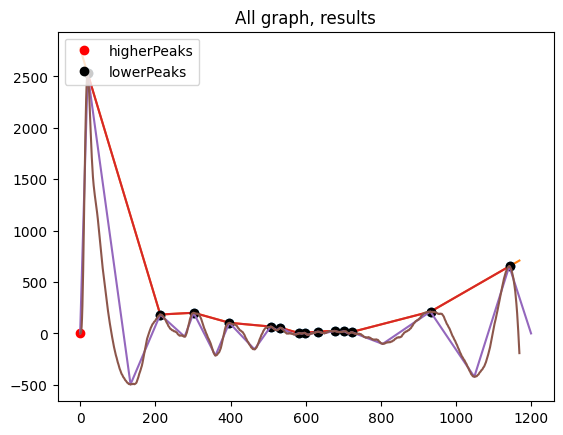

peaks [[[20, 2359.5605694767764], [242, 286.13488481276045], [342, 103.3518618806524], [462, 125.70500713450629], [542, -27.140608441331814], [567, -14.20295617011801], [617, 36.67388095088337], [642, 26.87392460915924], [677, 38.861017607669936], [692, 41.672690368581186], [717, 20.908954837958497], [807, -67.96770997152976], [927, 200.8653362136731], [1142, 631.5301237349121]], [[135, -427.1535217027845], [310, -119.60928895331507], [419, -167.82619935914548], [529, -43.89766227295196], [554, -41.72963119179025], [579, -25.600449267877227], [629, -3.763783700086625], [654, 17.076893239440743], [684, 30.207313008001247], [709, 13.213313669770981], [794, -101.36489674488895], [824, -80.67862489284309], [1055, -420.081643087885]]]
[[[0, 0]], [[20, 2359.5605694767764], [242, 286.13488481276045], [342, 103.3518618806524], [462, 125.70500713450629], [542, -27.140608441331814], [567, -14.20295617011801], [617, 36.67388095088337], [642, 26.87392460915924], [677, 38.861017607669936], [692, 41

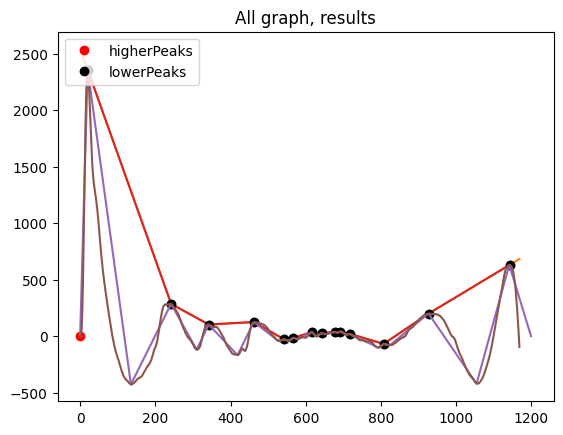

peaks [[[20, 2196.983034257201], [182, -45.17235249349213], [267, 202.96146592136694], [357, 95.1162966220834], [446, -27.832539382592152], [482, 3.4700607373458228], [502, 12.364220719962958], [537, 29.448299281015046], [577, 7.516074929411546], [632, 21.08659029976954], [657, 39.746683983465594], [697, 23.761372960665145], [717, 21.682440847553814], [756, -16.44486643555558], [792, -52.41436366704106], [842, -52.249836136383905], [922, 182.18559754426283], [937, 185.72964957747573], [1147, 557.0718361039486]], [[120, -425.5860304865333], [204, -101.4501767927277], [334, -125.14678972390173], [414, -59.873574172988974], [459, -56.39364752564133], [489, -4.05968558641086], [509, 7.709823483393484], [559, -8.698852585553963], [594, -10.07499071965475], [639, 14.090151470323008], [674, 10.435644490573903], [709, 16.230080622211744], [744, -34.703906679335], [784, -59.437916028745455], [829, -100.0687291364903], [850, -65.81273748536724], [929, 172.7917723781755], [1054, -365.824640300573

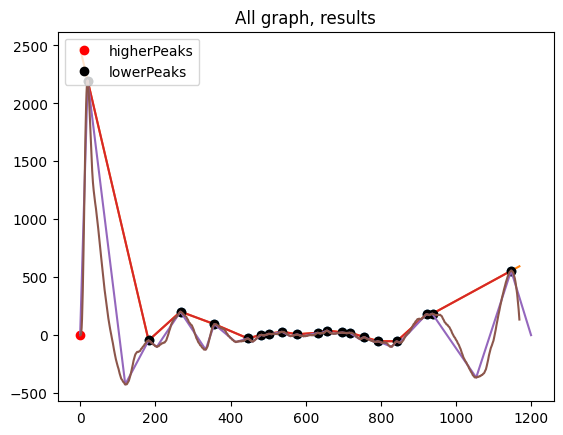

peaks [[[20, 1787.2522468484003], [112, -89.09296813114265], [167, -232.87965469811815], [231, 167.67660953196048], [316, 159.03843993996833], [417, -27.910639933299727], [437, -11.836227120251852], [467, 2.532018651234452], [507, 15.331592130138477], [527, 10.63115381799666], [547, 24.252409373778736], [582, 25.698568917690856], [601, 29.56330584052509], [636, 15.353828585555906], [657, 10.356307808822104], [687, 20.270291012517962], [707, 19.48571724378619], [732, 11.136592293493988], [762, -21.39493896648148], [922, 171.09487227248837], [936, 167.4873979533281], [956, 169.9609179926201], [1147, 535.6858155650586]], [[99, -162.35475525176227], [159, -249.23116493651193], [179, -274.3729843872148], [284, -52.98160611048408], [384, -79.04816895119076], [424, -36.21830903418859], [444, -18.614171748653426], [484, -21.066738733550856], [519, -3.234201532206669], [534, 5.17722801332706], [559, -10.492464434626275], [589, 18.6670091457129], [619, -4.903752253058732], [649, -6.4969517441412

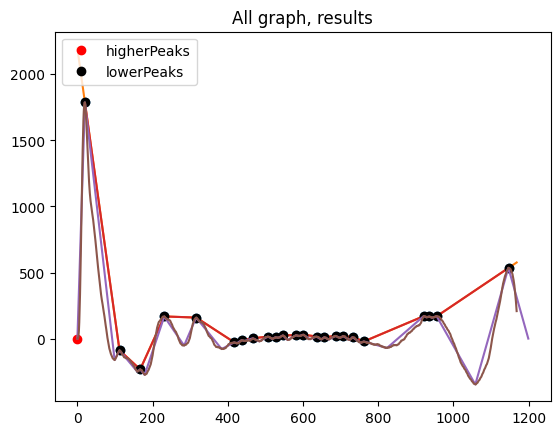

peaks [[[20, 1708.0063005312295], [127, -76.67876487910215], [151, -71.61998421642312], [242, 152.71153571594522], [317, 120.72432863545156], [411, -42.65858607187554], [457, -3.8329814461570586], [507, 29.787994339011515], [537, 13.110308199234355], [592, 7.466434007599515], [622, 18.28698515703858], [662, 35.51633553714885], [722, 18.903018222789463], [742, -1.3243218744458036], [786, -33.78686507985817], [811, -57.96877228796319], [836, -40.92523201485387], [931, 192.92071236255578], [952, 185.54753606983294], [1147, 544.9272020806033]], [[110, -264.58546150610425], [139, -90.50668472453393], [189, -225.3869209386603], [294, -56.87615986025258], [398, -77.43597777386289], [419, -58.94639778541368], [469, -14.985879541301685], [524, 1.577790769750961], [579, -11.75640737149456], [604, -2.4836820032295943], [649, -3.3843589360812474], [704, -6.884569551739823], [734, -8.242044574489233], [779, -41.756582708131965], [799, -64.64076570480937], [824, -73.3545622294113], [844, -59.7374630

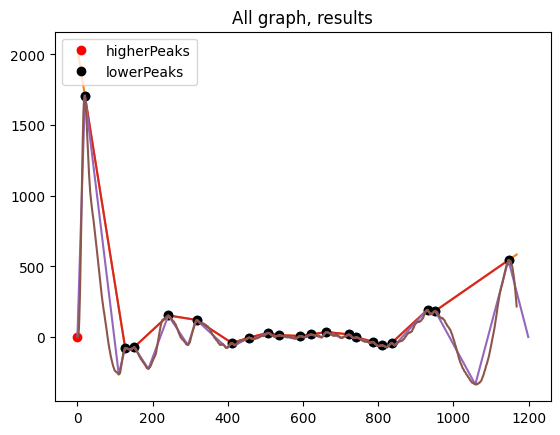

peaks [[[20, 1609.2292337200413], [181, 11.850751761182835], [265, 207.9997607061128], [367, 97.07687221823431], [451, -27.092045493229804], [486, -4.881924645636666], [511, 19.9880633343334], [532, 18.76203134921953], [566, 21.661845583602258], [606, 20.809303908927248], [636, 18.493661642482856], [671, 15.17697767751667], [701, 25.007490045894144], [786, -38.937454807271465], [817, -31.360300275534502], [941, 152.0533841867449], [961, 139.98481147674775]], [[119, -319.6620065510185], [209, -100.72092112983486], [334, -95.07455523706659], [429, -66.63770258833347], [469, -55.464755790097094], [494, -11.679019571626592], [519, -1.3562403073134923], [549, -0.3733068074817833], [589, -12.538399629390053], [624, 5.601684019239556], [649, -0.19877600875011203], [679, 9.38445745986662], [774, -49.77368442149056], [804, -61.65066539843142], [834, -56.004955545525796], [954, 134.16351867219197], [1074, -277.8932393730404]]]
[[[0, 0]], [[20, 1609.2292337200413], [181, 11.850751761182835], [265

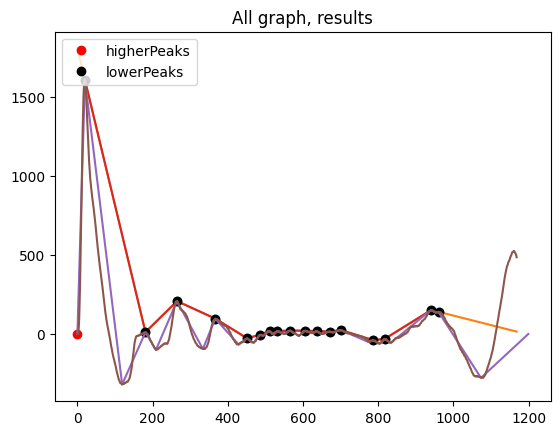

peaks [[[135, 502.4068642971325], [245, 85.24608379935583], [341, -171.69492287713038], [401, 298.1842792041563], [501, 157.8599554319913], [611, 174.934771228676], [632, 165.43428726882377], [716, 43.10873035007689], [737, 1.9195889674504787], [832, -68.36890549846838], [907, 235.54037459737472], [927, 270.9785956245153], [1141, 810.8670808459935]], [[20, -2478.6916769221716], [223, -234.17639237497147], [328, -211.64241628420385], [354, -228.99696090889515], [468, -204.1141377277219], [574, -233.3428015348728], [624, 148.9041710491093], [679, -35.90014557888617], [729, -8.834221018693228], [818, -139.98570073260407], [839, -84.51131660414052], [914, 218.2320381833135], [1054, -513.5517476441403]]]
[[[0, 0]], [[135, 502.4068642971325], [245, 85.24608379935583], [341, -171.69492287713038], [401, 298.1842792041563], [501, 157.8599554319913], [611, 174.934771228676], [632, 165.43428726882377], [716, 43.10873035007689], [737, 1.9195889674504787], [832, -68.36890549846838], [907, 235.54037

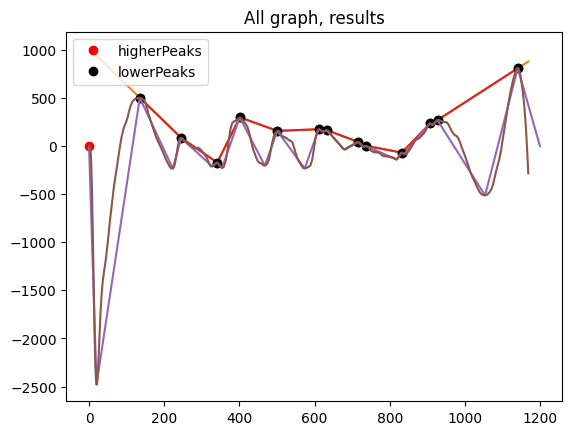

peaks [[[20, 3046.0994709114457], [228, 265.59340968650747], [313, 146.13070064890005], [433, 116.55127239212388], [452, 121.88216809502822], [478, 76.01297661669219], [557, 134.49218593947663], [578, 145.75748585668916], [673, -19.238052688679456], [723, 12.501013967245376], [748, 13.721882888204023], [773, 3.6643170239178], [803, 29.167681294013548], [833, 64.7430918358308], [858, 45.1876829440581], [893, 20.13792249539112], [918, 26.03137304186794], [1093, 260.3549270239968]], [[130, -607.7103427601216], [275, -30.542702202462728], [396, -225.76298561761843], [441, 104.62040142296821], [470, 63.27634430389394], [515, -142.30939924748006], [565, 126.95792068156004], [660, -71.01673886902063], [690, -54.074982786839875], [736, -2.028514436035706], [760, -13.807207706790082], [785, -7.637816092123132], [816, 3.5644300749210482], [850, 25.660031278316353], [886, 9.509466504686454], [901, 11.272074673083232], [1001, -107.92936967955114]]]
[[[0, 0]], [[20, 3046.0994709114457], [228, 265.5

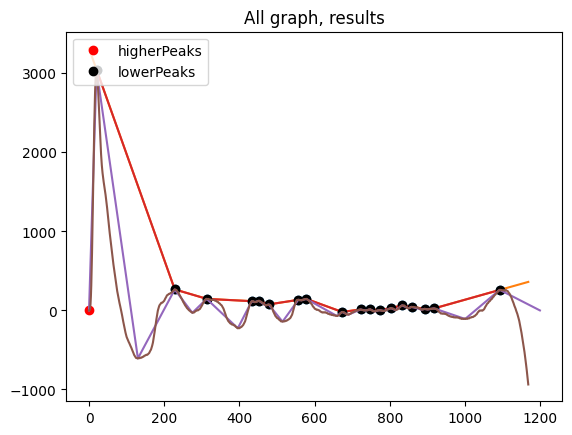

peaks [[[24, 137.43007330612377], [79, -60.04172075696098], [109, -127.78704873839162], [170, 214.70085845236227], [288, 126.73686943510783], [309, 104.33362382622953], [399, 159.38821381158246], [519, 82.94555847320825], [540, 103.17522474091783], [594, 22.721519039085567], [674, -63.230742667003064], [779, 128.32946802085584], [799, 128.06920987605892], [1049, 512.7603183936643]], [[10, -96.37154798659591], [71, -67.5861858206875], [101, -133.5765253512449], [141, -158.52681505479046], [246, -174.40798002102994], [301, 90.37837127145768], [361, -146.12912860497184], [491, -140.50969722363024], [527, 66.05764269377401], [587, 15.266117580167553], [657, -85.35829848449171], [687, -77.63172082497782], [787, 115.64812002576429], [932, -300.40086259635825], [1137, -825.9543635103379]]]
[[[0, 0]], [[24, 137.43007330612377], [79, -60.04172075696098], [109, -127.78704873839162], [170, 214.70085845236227], [288, 126.73686943510783], [309, 104.33362382622953], [399, 159.38821381158246], [519, 

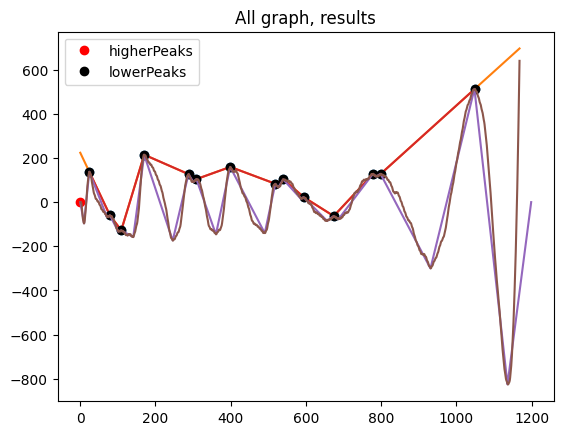

peaks [[[125, 512.7449825815254], [209, 199.13423486807412], [284, -244.6112320342643], [350, 193.388628535382], [451, 210.02524061833637], [510, -73.57098181334932], [580, 78.00936750518412], [641, 0.8626723398439928], [676, -17.611989989960907], [701, 18.390056519716694], [746, 33.825271245349164], [796, 44.35847879494687], [821, 35.77781890313524], [861, -27.174844520360516], [900, -71.85062230759867], [1021, 174.17806313264197]], [[20, -3103.158693356068], [188, 0.47832104556582805], [272, -296.14947995450484], [293, -260.57343474173325], [427, -111.34640732750191], [503, -84.91952685827079], [542, -131.11465500408923], [628, -41.11596743516346], [663, -38.999320939880796], [683, -26.05654760982046], [718, 10.041734984472955], [768, 10.87061171538455], [813, 18.798786308881603], [848, -44.00976854858959], [888, -85.96407007698375], [912, -104.90317407704232], [1118, -335.79077738506123]]]
[[[0, 0]], [[125, 512.7449825815254], [209, 199.13423486807412], [284, -244.6112320342643], [3

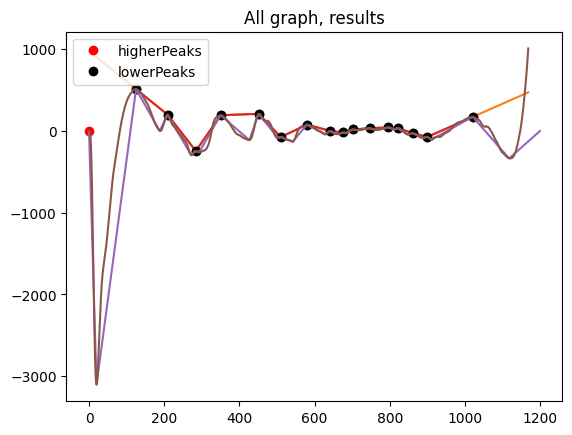

peaks [[[126, 196.38577131738643], [247, 155.90097728851308], [336, -178.8728914626332], [376, 236.28271124639988], [391, 218.35603855097472], [492, 145.44746597325124], [561, -105.03091292477536], [606, 103.02839372343801], [651, 34.58629849928005], [686, 36.59001769769492], [711, 19.529475495119684], [796, -58.458035988732775], [816, -62.40117877672704], [846, -25.50553988749145], [907, 141.82684063307798], [951, 182.22035498161281], [1151, 574.5547735520876]], [[22, -808.7169161852665], [223, -161.1414293357691], [328, -188.99669833677095], [343, -189.53124003612382], [384, 205.4841056340561], [458, -170.6166330501862], [549, -121.24413490548686], [578, -116.19663382685911], [644, 22.701466979921477], [669, 5.702098457769828], [699, -1.1595466119903224], [789, -63.429701144569925], [809, -72.56950784273091], [829, -73.20186305619374], [854, -34.54168982800234], [914, 133.02775202554366], [1064, -357.00588495991383]]]
[[[0, 0]], [[126, 196.38577131738643], [247, 155.90097728851308], 

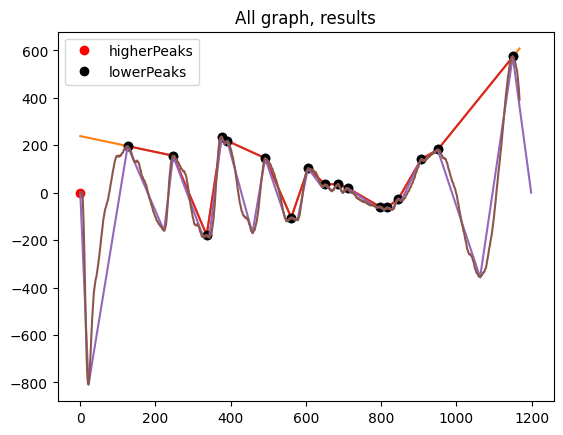

peaks [[[19, 1605.942996801831], [207, -121.71368150116517], [248, 330.7859214449505], [266, 302.8001187817561], [361, 138.17904974355912], [491, 192.29804246336073], [597, 148.3033394214457], [612, 140.0547539438558], [682, 15.721006100493657], [702, 7.941116331007366], [747, -24.70573919267422], [777, -70.62407403786835], [822, -66.36072400877968], [922, 250.9159935561536], [942, 258.5932707965509], [1137, 801.2582829072109]], [[134, -256.3006480637755], [214, -128.85738203737168], [259, 290.1932742889441], [335, -219.71667424086746], [459, -172.80882056911443], [565, -173.24576604471213], [604, 127.92212698964711], [664, -16.963611164236426], [694, -2.222686531051263], [739, -47.53823301732985], [769, -77.46501862044701], [804, -104.89197464319773], [829, -72.32215770719722], [930, 240.45536623787154], [1045, -489.63733864296154]]]
[[[0, 0]], [[19, 1605.942996801831], [207, -121.71368150116517], [248, 330.7859214449505], [266, 302.8001187817561], [361, 138.17904974355912], [491, 192

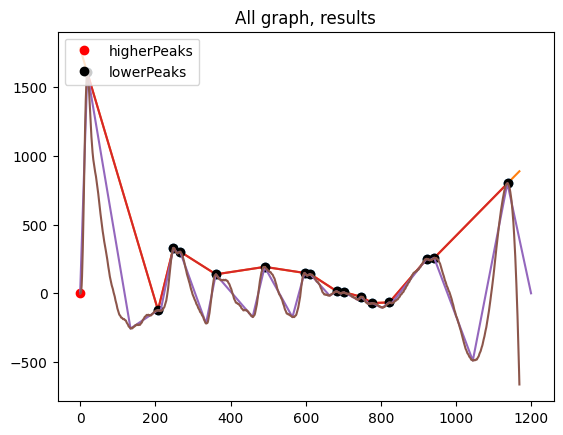

peaks [[[20, 3060.247496155855], [217, 170.8999655244638], [303, 221.79245565420032], [408, 53.26176392454388], [433, 51.05239986499601], [518, 138.76398853089506], [583, -18.634897639344903], [628, 19.20879419120928], [648, 14.032448425636003], [683, 20.980150859717124], [723, -15.804003378563364], [743, -6.433643306113], [773, 15.173129070073877], [828, 26.090584870107282], [883, 67.49543879560862], [913, 80.8533463887506], [1113, 312.25530600603935]], [[135, -632.8824684112141], [275, 26.8723771271533], [371, -200.26419119167818], [425, 33.948466451522734], [470, -85.40680755794239], [570, -36.432892230190845], [591, -39.210159437695594], [640, 2.6759124885807344], [665, -6.103078401095697], [711, -23.52757117007762], [730, -27.88212246100215], [756, -36.95642186852161], [790, -35.23554961169117], [851, -2.0972037057779156], [891, 56.6546932203463], [1021, -171.9030975304239]]]
[[[0, 0]], [[20, 3060.247496155855], [217, 170.8999655244638], [303, 221.79245565420032], [408, 53.2617639

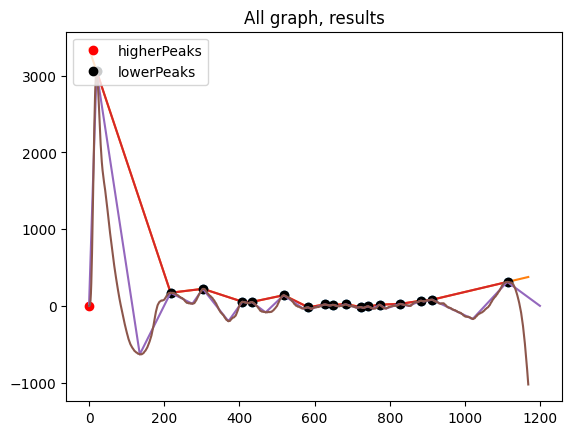

peaks [[[21, 919.3630948503036], [139, 48.55520987405067], [159, 21.820051678158634], [199, -95.92707078337301], [248, 193.28136615401075], [344, 90.98741341572557], [463, 97.20167287201888], [523, 2.015096687279461], [559, 2.635077793838202], [583, 25.721619631226034], [613, 2.3077449674977437], [648, 14.683407182062762], [678, 22.27668254993348], [704, 7.352769398951291], [728, -6.195047562307022], [769, 6.505555891887852], [804, 60.800546544393086], [828, 92.42475443235799], [848, 71.67723658258963], [933, -107.08394945590875], [1069, 253.7225964637119]], [[112, -300.80416889829974], [151, 4.005151087193849], [191, -107.23383683808729], [211, -111.63175938577838], [316, -125.16824257094966], [421, -131.90292347579748], [511, -17.411408793082753], [541, -25.30366958329556], [566, -11.74252952645947], [601, -23.38962309913371], [636, -26.597180811609746], [661, -7.242250311395005], [691, -9.029263224265433], [716, -30.095221501674494], [756, -40.678765828195246], [781, -8.385078084175

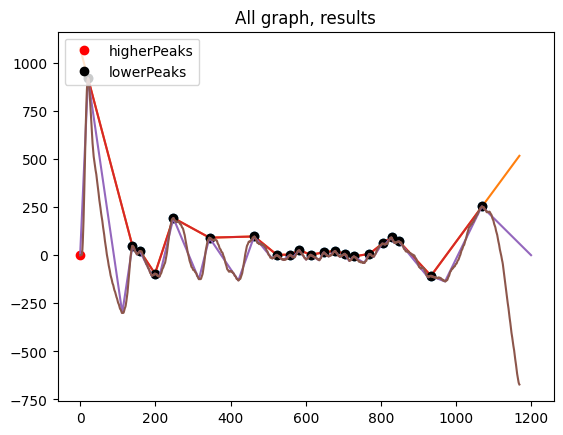

peaks [[[150, 347.87761453090667], [249, 56.67728215596032], [363, 142.08784223154626], [439, -86.82260545326295], [478, 123.03106543249261], [549, -18.227410276825236], [574, 14.982084899117934], [594, -7.339953228091193], [634, 16.547464155853728], [659, -8.29389872776258], [683, -10.879910039930241], [744, 37.902529075561375], [784, 99.01772071589288], [809, 88.59361794509911], [839, 73.54523627735668], [1059, 415.95281622938666]], [[18, -828.467803792203], [221, -169.15467406857488], [321, -122.49652697808345], [431, -100.03123810967429], [447, -95.92660214188254], [536, -31.06900953636089], [557, -33.80129130928394], [586, -21.33217456148751], [617, -22.005267536873774], [651, -17.67126735787716], [672, -32.4095820490943], [701, -45.84063376445766], [752, 30.506357364903046], [797, 73.30463883613456], [827, 60.271778449538004], [941, -226.59200282381966], [1142, -652.1423223464278]]]
[[[0, 0]], [[150, 347.87761453090667], [249, 56.67728215596032], [363, 142.08784223154626], [439, 

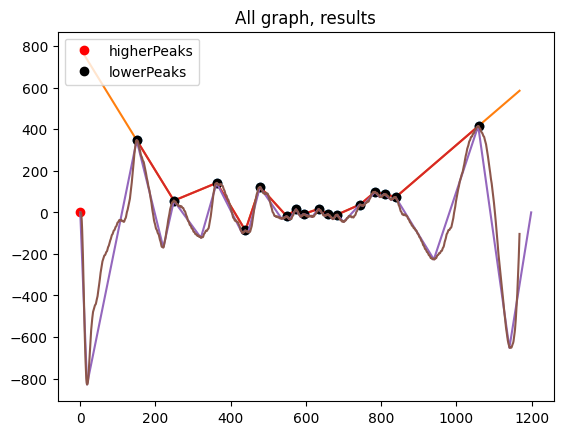

peaks [[[20, 2761.4913732028986], [181, 59.9357132301531], [202, 60.71051133919186], [246, 244.5521325552936], [297, 163.81986926335986], [357, 98.25526821352821], [422, -94.83837757944224], [496, 231.95991457897725], [562, 44.73071332593758], [627, 114.7582269704901], [702, -8.883505459023038], [777, 151.75111983360912], [836, 59.35942751535977], [916, 307.11214453727234], [962, 150.20124995523437], [1146, 581.3100171064707]], [[140, -573.8216697418718], [189, 42.479401944683936], [219, -39.47852318980089], [279, 14.746197456710808], [325, -67.64176964065805], [410, -111.13915857981591], [449, -123.86300325659887], [540, -104.02514402149575], [593, -106.86758636469251], [679, -31.91232853935577], [744, -77.6213537569629], [810, -165.99602726604476], [870, -145.120236199027], [949, 115.0248152241298], [1049, -351.52790471790007]]]
[[[0, 0]], [[20, 2761.4913732028986], [181, 59.9357132301531], [202, 60.71051133919186], [246, 244.5521325552936], [297, 163.81986926335986], [357, 98.255268

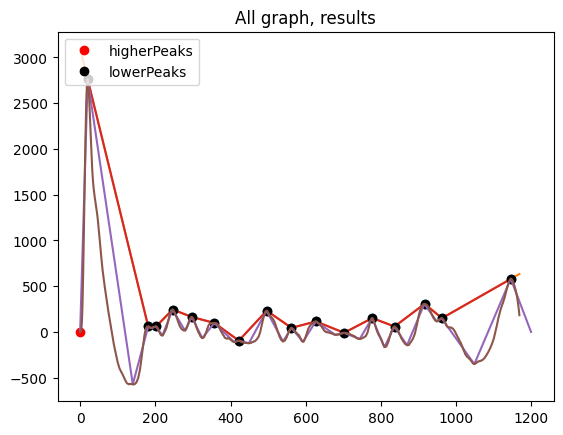

peaks [[[20, 1553.16379259803], [182, 176.8818425161183], [237, 93.01869662571113], [301, 121.10315906900186], [356, 67.48033988364132], [381, 24.677489951186686], [407, 23.80200271395285], [451, 7.176170683498264], [541, 202.55960612971444], [597, 31.784489865205284], [676, 99.64124385825556], [726, -2.611837473473257], [751, 37.77063047682811], [855, 78.69367224704862], [931, 78.88226919345836], [976, 125.81015554546464], [997, 145.16381426211532], [1107, -38.40840610065118]], [[134, -343.0729941242265], [214, -72.5342240097518], [264, -47.131067995269184], [340, -110.94222027022059], [368, -13.319258303465167], [394, -43.22162367460543], [434, -31.90325108650757], [504, -99.91907008587748], [580, -94.77881901104317], [629, -145.17454003206436], [709, -14.313010936561922], [734, -10.697434317158459], [829, -101.49147787654249], [889, -129.84981029693546], [949, -0.04613650787803453], [988, 113.03288193340647], [1088, -319.9107499457723], [1117, -61.36875810161297]]]
[[[0, 0]], [[20, 

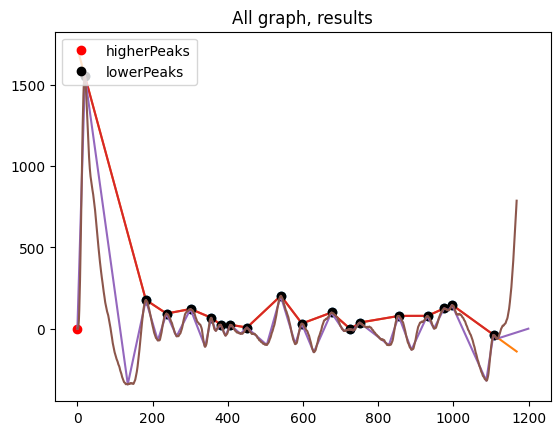

peaks [[[125, 207.81916364171033], [220, 143.87897094510953], [276, 33.46794814737894], [345, 46.07829290788954], [396, 129.74189314870108], [419, 154.9517012109255], [455, 19.244115557968733], [480, 7.54648563756543], [510, -34.63726635715972], [560, -36.03990480956092], [604, 193.85543176310358], [659, 64.3722236665376], [730, 68.64736601662409], [775, 69.37807627591125], [810, 58.86318100125026], [894, -14.468709815748069], [965, 43.09323390813359], [1035, 272.5494818194782], [1081, 312.3574810791229]], [[21, -841.4388923334063], [199, -81.97412454757763], [252, -146.41050418382147], [307, -169.59994423541846], [372, -121.61554898964557], [403, 118.65648128865972], [443, -3.0331984551503046], [468, -8.049350339783789], [503, -44.97810089692682], [538, -96.99865629825302], [583, -67.79736185446511], [639, -88.1223042349881], [688, -118.05174887873613], [753, 7.837225676647576], [797, 34.88932033808222], [874, -114.88823305908], [923, -300.40178464516265], [983, -2.3433379017982303], 

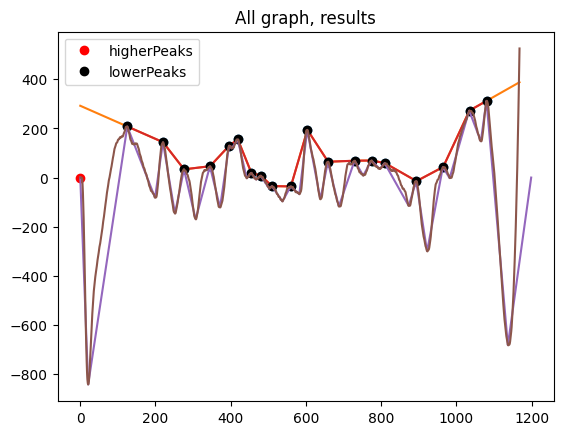

peaks [[[125, 379.9096979142767], [165, 431.56998937680726], [235, -91.40614332375422], [304, -62.145083848024946], [369, 189.72470449425938], [439, -16.590659521878457], [519, 96.11735453931749], [568, 139.344980094168], [625, 87.43188058411589], [714, -41.145481811218076], [739, -23.078584595138796], [759, -26.250833119725588], [809, 196.10239942557095], [863, 157.7509552380685], [923, -188.63592466017892], [994, 178.8150458711039], [1013, 182.98812810755393], [1084, 177.0549319166449]], [[20, -2546.1711539782873], [152, 330.1500416853083], [222, -149.9367918024308], [276, -307.743908088779], [322, -97.52649629514933], [432, -24.144039640724106], [486, -133.4797426413492], [547, -28.60062158425322], [602, -74.11538524678102], [697, -77.49573035932113], [727, -53.955760123668284], [747, -47.83367890946514], [782, -50.67044208200824], [841, 11.293071089044854], [912, -202.17200560319574], [946, -269.4596294641294], [1001, 169.05823867277758], [1046, 114.75469659767984]]]
[[[0, 0]], [[1

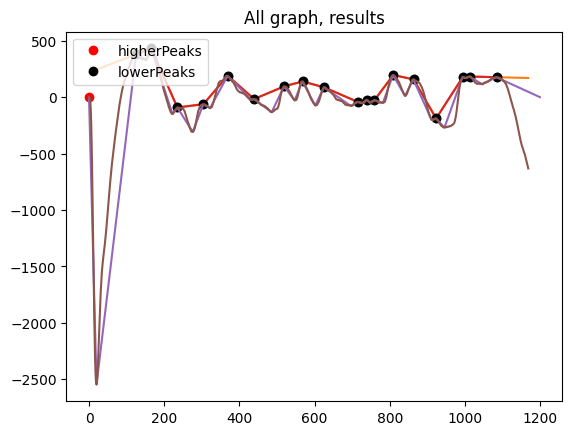

peaks [[[29, -144.3249342224998], [99, -28.06441553207381], [173, 241.9111958328456], [245, 159.625858742125], [295, 297.84028599373084], [373, 176.84081719623288], [423, 5.080796135689969], [439, 17.963124421367937], [463, -29.993399040769475], [524, 111.5150951880464], [592, 67.09874342687456], [658, 136.6987412070465], [698, 58.29056289175199], [828, 193.80252829336231], [889, 330.78029084226347], [903, 332.89227880928956], [1118, 395.7857585673513]], [[15, -212.86245512545446], [36, -160.3668972066461], [141, -181.73096948782518], [221, -172.84371666370637], [272, -102.30040203139855], [331, -307.6829254420961], [416, -1.3506347485398256], [431, -3.7748255265636206], [456, -35.514457925649204], [501, -118.91315607320905], [566, -58.101502887447054], [620, -109.69141028237478], [690, 48.879071171278724], [805, -242.95257348903485], [864, -55.707907878011824], [896, 322.760601961866], [1030, -408.4807311591612]]]
[[[0, 0]], [[29, -144.3249342224998], [99, -28.06441553207381], [173, 2

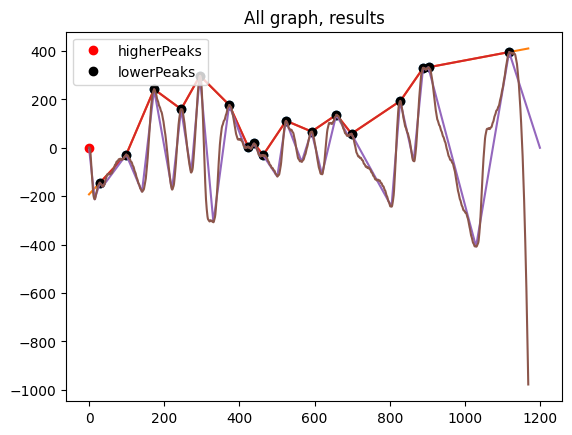

peaks [[[20, 1814.354102405923], [158, 29.842565648461285], [208, 78.28701075289801], [257, 148.95679016186435], [304, 127.78447060507686], [398, -28.700720161790162], [438, -78.86535924515452], [482, 111.00984941595743], [542, 43.2075483935113], [582, 54.504627064982316], [602, 65.53472619033741], [658, -39.00461852597812], [722, 233.17250917422814], [792, 17.178740995585294], [907, 293.8951204893561], [927, 281.37974237794276], [1138, 692.0976712200217]], [[125, -475.29113431318933], [186, -163.69345039556637], [231, -63.53973260486834], [286, -0.9787282988886901], [385, -48.122420043404816], [425, -96.96676427509752], [445, -90.1256446336696], [520, -47.23354193870785], [560, -4.810432473971336], [590, 41.163147834285844], [651, -51.18395232885373], [690, -166.72925786976026], [765, -75.04177921702755], [835, -202.97730292212526], [919, 268.29730022270223], [1060, -456.10727485257786]]]
[[[0, 0]], [[20, 1814.354102405923], [158, 29.842565648461285], [208, 78.28701075289801], [257, 1

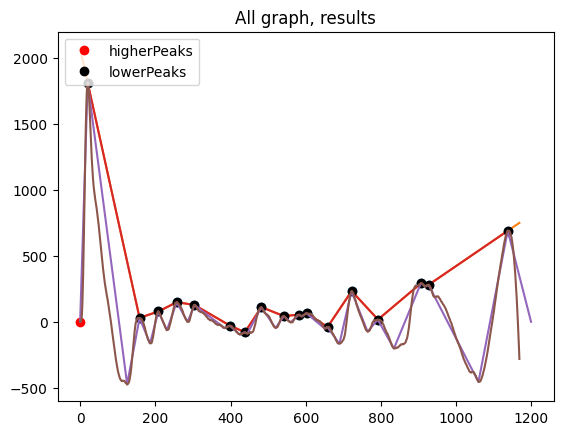

peaks [[[20, 2340.947428347262], [136, -104.38887118629249], [197, 21.38943969396359], [241, 159.7806808034469], [292, 151.48547134925997], [372, -41.137108707851326], [401, -62.363473010603606], [431, -39.20798016907592], [467, 127.00293718695269], [521, 8.025870681996588], [591, 109.02156335371002], [626, 62.33762339354342], [746, 202.15537473352856], [805, 249.77132021368394], [896, -205.97233372797464], [951, 197.57909751748502], [975, 193.5460836076926], [1005, 145.4877621306038], [1026, 114.5790935776228]], [[113, -484.8308256784959], [165, -314.2286609698864], [214, -89.75224302993794], [269, 36.93162267129418], [359, -76.88186524816707], [384, -92.61209587699035], [409, -69.99943508665721], [443, -59.28615734674083], [504, -48.58732508716509], [549, -92.44639535031357], [619, 57.02927091987148], [719, -258.2678631256278], [784, 53.154900696649655], [888, -212.96811422923594], [904, -216.39028281995041], [963, 153.7454969339843], [989, 111.8269598528953], [1018, 105.715842755565

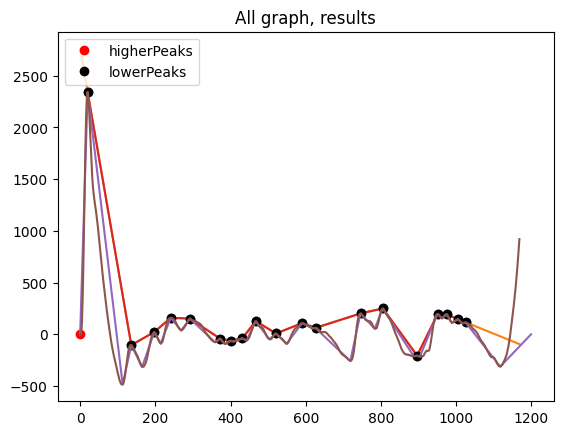

peaks [[[133, 576.6536306141677], [200, -60.80285736744101], [241, -105.43965978396704], [260, -88.20593802844995], [300, 81.51661163434487], [326, 86.28130975764016], [462, 212.8724509408774], [515, 50.42681012735401], [595, 87.65851473813238], [625, -7.8093983648982075], [650, -7.04311808100492], [735, 101.93444493763158], [790, 219.2379281527874], [960, 20.589558206358497], [1050, 408.03908794188885]], [[21, -1018.7141832236491], [189, -89.46980032336091], [224, -201.91650214451252], [248, -114.00536423864477], [268, -113.46396349643302], [313, 72.8770013788956], [428, -134.00208788725774], [498, -43.35477566065443], [552, -89.95331713430927], [613, -27.80291561504295], [643, -19.14386919778883], [698, -125.06617164429576], [767, 30.893173931054697], [912, -418.81103912590936], [977, -26.876986449905207], [1137, -645.0036872986153]]]
[[[0, 0]], [[133, 576.6536306141677], [200, -60.80285736744101], [241, -105.43965978396704], [260, -88.20593802844995], [300, 81.51661163434487], [326,

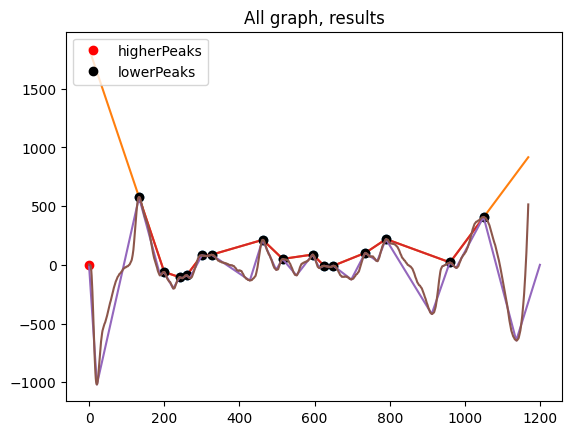

peaks [[[129, 393.39939593779025], [169, 431.9835660854365], [229, -64.70698449526812], [294, -124.7886295121], [363, 226.5371906087262], [514, 103.58179674085557], [574, 88.35867803153405], [628, 81.3975090319374], [680, -17.020080638036813], [714, -66.00939507871962], [798, 158.97907744517423], [843, 174.21970393414563], [998, 202.56772361082335], [1019, 193.24374387708406], [1089, 156.6440303488028]], [[20, -2510.5840528386884], [147, 310.49673681450776], [217, -94.6880230124402], [262, -260.3608438531154], [311, -162.29260774211605], [482, -164.91714371471812], [556, -24.852023099646253], [606, -53.90902858881667], [671, -38.98220642790707], [707, -72.9894393857665], [732, -95.24878484091155], [822, -15.20083545110266], [966, -299.12904936756803], [1007, 172.97984189554833], [1046, 118.26978882036451]]]
[[[0, 0]], [[129, 393.39939593779025], [169, 431.9835660854365], [229, -64.70698449526812], [294, -124.7886295121], [363, 226.5371906087262], [514, 103.58179674085557], [574, 88.358

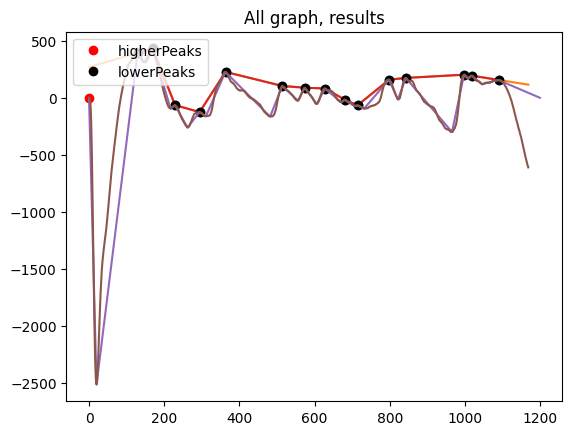

In [ ]:

def detect_peak(x,a):
    peaks = peakdetect(x, lookahead=10)
    print ("peaks", peaks)
    peaks.insert(0, [[0, 0]])
    peaks.append([[1200, 0]])

    print(peaks)
    higherPeaks = np.array(peaks[0])
    lowerPeaks = np.array(peaks[1])

    #3.1 Interpolation High peak
    f_high = spi.interp1d(np.array(higherPeaks[:,0]), np.array(higherPeaks[:,1]),fill_value="extrapolate")
    x_new = np.array(list(range(0,len(x),1)))

   # tester = spi.interp1d(np.array(peaks),fill_value="extrapolate")
   # plt.plot(tester)
   # plt.show()

    print ("ok2")
    y_high_inter = ynew = f_high(x_new)   # use interpolation function returned by `interp1d`
    #plt.plot(higherPeaks[:,0],  higherPeaks[:,1], 'o', x_new, ynew, '-')
    #plt.show()
    #3.2 Interpolation High peak

    f_low = spi.interp1d(np.array(lowerPeaks[:,0]), np.array(lowerPeaks[:,1]),fill_value="extrapolate")
    y_low_inter  = f_low(x_new)   # use interpolation function returned by `interp1d`

    plt.plot(lowerPeaks[:,0],  lowerPeaks[:,1], 'o', x_new, y_low_inter, '-')
    #plt.title("interpolation function")
    #plt.show()

    plt.plot(higherPeaks[:,0], higherPeaks[:,1])
    plt.plot(lowerPeaks[:,0], lowerPeaks[:,1])
    #plt.plot(x)
    plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro', label='higherPeaks')
    plt.plot(lowerPeaks[:,0], lowerPeaks[:,1], 'ko', label='lowerPeaks')
    plt.title("All graph, results")

    EMD_Y = (y_high_inter + y_low_inter)/2


    peaks = list(itertools.chain.from_iterable(peaks))
    peaks.sort()
    x_inter = [point[0] for point in peaks]
    y_inter = [point[1] for point in peaks]
    from scipy.interpolate import interp1d
    interp_func = interp1d(x_inter, y_inter, kind='linear')

# Generate points for interpolation
    x_interp_final = np.linspace(min(x_inter), max(x_inter), num=1200)
    #x_interp_final = x_interp_final.astype(int)
    y_interp_final = interp_func(x_interp_final)
    #print ("x_interp_final",x_interp_final.shape)
    print ("x_interp_final",x_interp_final)
    #plt.plot(EMD_Y, label='EMD data')
    #print ("x_interp_final", x_interp_final)

    plt.plot(y_interp_final)
    plt.legend(loc="upper left")
    plt.plot(x)
    plt.show()

    #print ("EMD_Y", EMD_Y)
    #plt.title("Raw data and after EMD")
    #plt.plot(EMD_Y)
    dataset_y_inter.iloc[a] = y_interp_final
    #plt.plot(data_after_filter)
    #plt.show()

dataset_y_inter = pd.DataFrame(np.random.rand(27, 1200))

for a in range (0,27,1):
  detect_peak(dataset_y[a],a)


(27, 1169)
(27, 1200)


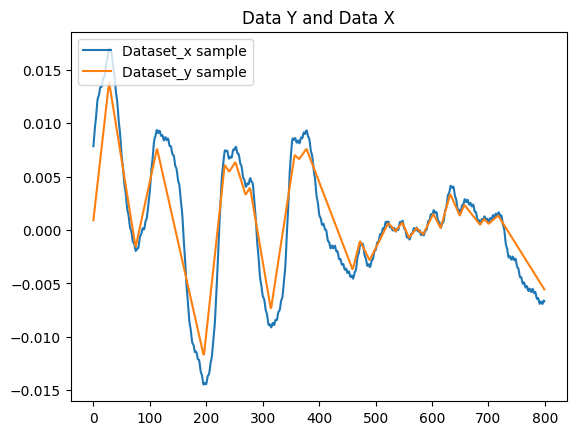

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (-1, 1))

#dataset_y = dataset_y.reshape(1, -1)
#dataset_y = sc.fit_transform(dataset_y)
dataset_y = preprocessing.normalize(dataset_y)

#dataset_x = dataset_x.reshape(1, -1)
#dataset_x = sc.fit_transform(dataset_x)
dataset_y_inter = preprocessing.normalize(dataset_y_inter)

#dataset_x = np.reshape(dataset_x, (27,800,1))
print (dataset_y.shape)
print(dataset_y_inter.shape)
#dataset_y = np.reshape(dataset_y, (27,800,1))
#print (dataset_x.shape)

#dataset_y_inter = dataset_y_inter.to_numpy()
#dataset_x = np.reshape(dataset_x, (27,800,1))
#print(dataset_y[0].shape)

dataset_y = dataset_y[:, :1000]
dataset_y = dataset_y[:, 200:]

dataset_y_inter = dataset_y_inter[:, :1000]
dataset_y_inter = dataset_y_inter[:, 200:]

plt.plot(dataset_y[10], label='Dataset_x sample')
plt.plot(dataset_y_inter[10], label='Dataset_y sample')

plt.legend(loc="upper left")
plt.title("Data Y and Data X")
plt.show()



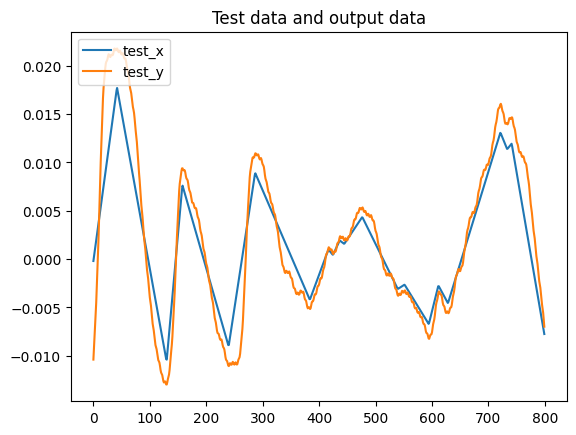

shape (26, 800)
Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 1.0514
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.0436
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.0358
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.0280
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.0202
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.0124
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.0045
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.9967
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.9888
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.9809
Epoch 11/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.9730
Epoch 12/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.9650
Epoch 13/1000
1/1 [====

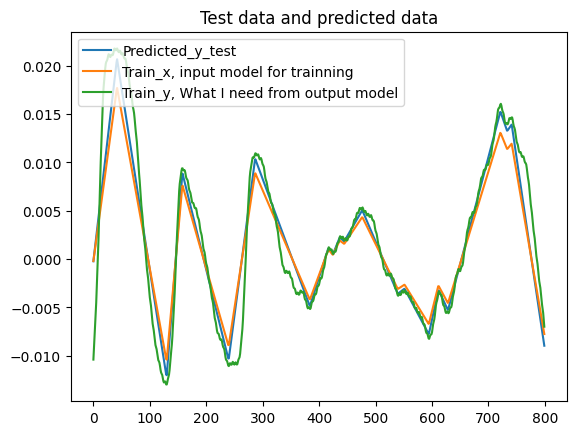

In [ ]:
test_y = dataset_y[0]
#dataset_y_inter = dataset_y_inter.to_numpy()
test_x = dataset_y_inter[0]
plt.plot(test_x, label='test_x')
plt.plot(test_y, label='test_y')
plt.legend(loc="upper left")
plt.title("Test data and output data")
plt.show()

dataset_y = dataset_y[:26, :]
dataset_y_inter = dataset_y_inter[:26, :]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, UpSampling1D
model = Sequential()
model.add(Dense(10, input_shape=(800,1), activation='tanh'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

#model.add(LSTM(units = 10,return_sequences=True,input_shape=(800,1)))
#model.add(UpSampling1D(size=2))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(LSTM(units = 800,return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(LSTM(units = 50,return_sequences=True,activation='sigmoid'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(LSTM(units=50))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(Dense(units=1, activation='sigmoid'))




model.compile(optimizer='adam', loss='MAE')  # sgd, rmsprop, or adagrad
#new_dataset_y = new_dataset_y.to_numpy()
print ("shape", dataset_y_inter.shape)
model.fit(dataset_y_inter, dataset_y, batch_size=100, epochs=1000)

print("ok1")
test_x = np.reshape(test_x, (800, 1))
print("ok2")

predicted_y_test = model.predict(test_x)
predicted_y_test = predicted_y_test.flatten()

plt.plot(predicted_y_test, label='Predicted_y_test')
predicted_y_test = predicted_y_test
plt.plot(test_x, label='Train_x, input model for trainning')
plt.plot(test_y, label='Train_y, What I need from output model')
plt.legend(loc="upper left")
plt.title("Test data and predicted data")
plt.show()
